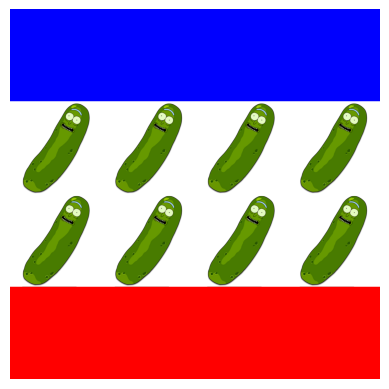

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the image
loc_input = os.path.join('data', 'input', "pickle_rick.png")
loc_output = os.path.join('data', 'output')
image = Image.open(loc_input)
np_image = np.array(image)

# Get the size of the original image
img_height, img_width = np_image.shape[:2]

# Initialize a new array to hold the tiled image
tiled_height = img_height * 4
tiled_width = img_width * 4
tiled_image = np.zeros((tiled_height, tiled_width, np_image.shape[2]), dtype=np_image.dtype)

# Manually repeat the image by copying it into the correct positions
for i in range(4): # Vertical replication
    for j in range(4): # Horizontal replication
        vertical_start = i * img_height
        vertical_end = (i + 1) * img_height
        horizontal_start = j * img_width
        horizontal_end = (j + 1) * img_width
        tiled_image[vertical_start:vertical_end, horizontal_start:horizontal_end] = np_image

# Fill the top row with all red pickle_ricks
tiled_image[:img_height, :, 0] = 0 # Blue
tiled_image[:img_height, :, 1] = 0 # Green
tiled_image[:img_height, :, 2] = 255 # Red
tiled_image[:img_height, :, 3] = 255 # Alpha

# Fill the bottom row with all blue pickle_ricks
tiled_image[-img_height:, :, 0] = 255 # Blue
tiled_image[-img_height:, :, 1] = 0 # Green
tiled_image[-img_height:, :, 2] = 0 # Red
tiled_image[-img_height:, :, 3] = 255 # Alpha

# Display the tiled image
plt.imshow(tiled_image)
plt.axis('off') # Hide the axis
plt.show()

# Save the image
output_image = Image.fromarray(tiled_image)
output_image.save(os.path.join(loc_output, 'tiled_pickle_rick_custom.png'))

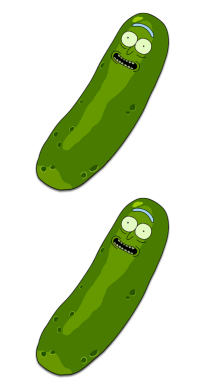

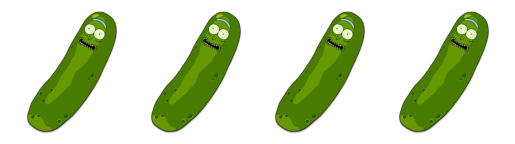

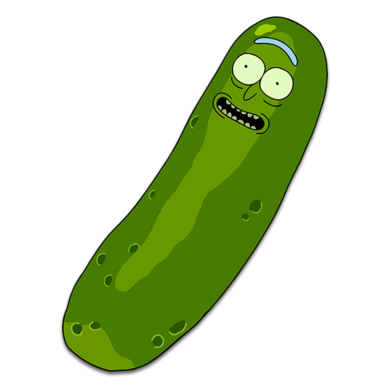

(1024, 1024, 4)

In [58]:
from PIL import Image
import numpy as np
import os

# Load the image
loc_input = os.path.join('data', 'input', "pickle_rick.png")
loc_output = os.path.join('data', 'output')
image = Image.open(loc_input)
np_image = np.array(image)

# Get the size of the original image
img_height, img_width = np_image.shape[:2]

pickle_temp = np_image.repeat(2, axis=1)
double_rick = pickle_temp.repeat(2, axis=0)
v_stack = np.append(np_image, np_image, axis=0)
h_stack = np.tile(np_image, (4,1))

def alterColor(image, color):
    img = image.convert("RGBA")

    for x in range(0, image.shape[1]):
        for y in range(0, image.shape[0]):
            pixel = img.getpixel((x, y))
            r, g, b, a = pixel
            if color == 0: 
            img.putpixel((x, y), (r, 0, 0, a)) # setting green and blue values to zero
            elif color = 1: 
            img.putpixel((x, y), (0, g, 0, a)) # setting red and blue to zero
            else: 
            img.putpixel((x, y), (0, 0, b, a)) # setting green and red values to zero
    return img

altered_blue = alterColor(h_stack, 2)
altered_green = alterColor(h_stack, 1)
altered_red = alterColor(v_stack, 0)

# Display the tiled image
plt.imshow(altered_blue)
plt.axis('off') # Hide the axis
plt.show()

plt.imshow(altered_green)
plt.axis('off') # Hide the axis
plt.show()

plt.imshow(double_rick)
plt.axis('off') # Hide the axis
plt.show()

v_stack.shape
h_bottom.shape
double_rick.shape
# Save the image
#output_image = Image.fromarray(tiled_image)
#output_image.save(os.path.join(loc_output, 'tiled_pickle_rick_border.png'))